### Batch gradient decent for linear regression

- June 7, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load data file -- the file contains 100 rows with 2 columns

In [2]:
# read the whole file as a list of stings

data = []  # a placeholder of data

def read_data(file_name):
    '''
    file_name: a string contains the name of the file, 'batch_gr_decent_data.txt'
    
    fill the data list with points
    '''
    with open(file_name) as file:
        str_line = file.readlines()
        
    
    for i in range(len(str_line)):
        single_line_list = str_line[i].rstrip("\n").split(",") # strip "\n" and split 
        list_data = [float(f) for f in single_line_list]
        data.append(list_data)

In [3]:
read_data('batch_gr_decent_data.txt')

In [4]:
data = np.array(data)
print(data.shape)

(100, 2)


In [5]:
data[:3,:3]

array([[-7.24070e-01,  2.23863e+00],
       [-2.40724e+00, -1.56000e-03],
       [ 2.64837e+00,  3.01665e+00]])

In [6]:
data[0]

array([-0.72407,  2.23863])

### Plot a scatter plot of data

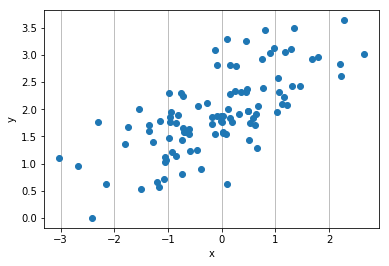

In [7]:
x = data[:,0]
y = data[:,1]

plt.plot(x, y, 'o')
plt.grid(axis='x')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### gradient decent
- Equation of the line: $y^\prime = w1*x + w2$, $y^\prime$ is the estimated point, $y$ is real point


- E = $\frac{1}{2}\sum_{i=1}^{m}(y_i - y^\prime_i)^2 = \frac{1}{2}\sum_{i=1}^{m}(y_i - (w1*x_i + w2))^2$


- $\frac{\partial E}{\partial w1} = \sum_{i=1}^{m}(y_i - (w1*x_i + w2))(-x_i)$


- $\frac{\partial E}{\partial w1} = \sum_{i=1}^m(y_i- y^\prime_i)(-x_i) = \sum_{i=1}^m(y^\prime_i - y_i)$


- $\frac{\partial E}{\partial w2} = \sum_{i=1}^m(y- y_i)(-1) = \sum_{i=1}^m(y^\prime_i- y_i)$


- $w1 = w1 - \alpha \frac{\partial E}{\partial w1}$


- $w2 = w2 - \alpha \frac{\partial E}{\partial w2}$

### initialize slope, w1 and intercept, w2

In [8]:
w1 = 0
w2 = 0

In [9]:
y_hat = w1*x + w2

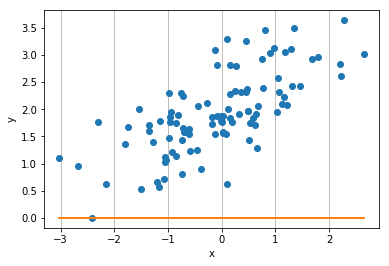

In [10]:
%matplotlib inline

plt.plot(x, y, 'o')
plt.plot(x,y_hat,'-')
plt.grid(axis='x')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
def new_estimate(w1, w2):
    y_hat = np.dot(w1, x) + w2
    return y_hat

def estimateGradient(y, y_hat):
    return (y - y_hat)  

In [17]:
y[0], y_hat[0]

(2.23863, 0.0)

In [18]:
# estimateGradient(y, y_hat)

In [19]:
w1 = 1
w2 = 1
error = 100
err = []
alpha = 0.001
for i in range(100):
#     print("error", error)
    y_hat = new_estimate(w1, w2)
    w1 = w1 + alpha*np.sum((estimateGradient(y, y_hat)*x))
#     print("w1: ", w1)
    w2 = w2 + alpha*np.sum(estimateGradient(y, y_hat))
#     print("w2: ", w2)
    error = 0.5*np.sum((y - y_hat)**2)
    err.append(error)

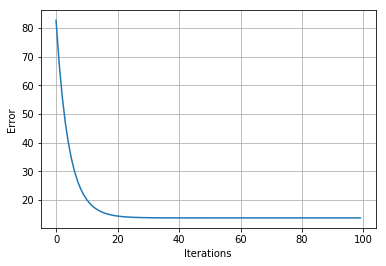

In [20]:
plt.plot(err, '-')
plt.grid()
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()

In [21]:
w1

0.4689883371596802

In [22]:
w2

1.969790436928809

In [23]:
y_hat = new_estimate(w1, w2)

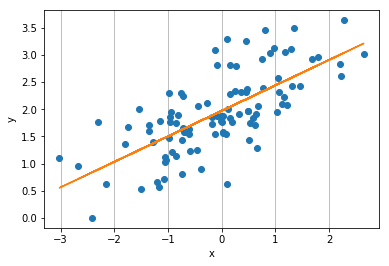

In [24]:
plt.plot(x, y, 'o')
plt.plot(x,y_hat,'-')
plt.grid(axis='x')
plt.xlabel("x")
plt.ylabel("y")
plt.show()